Na seção anterior definimos o problema a ser resolvido.

Primeiro passo: Ir do não ter um problema e uma definição do que a gente quer resolver, para um estado que a gente sabe o que queremos resolver.

E agora a gente precisa conseguir os dados para resolver esse problema.

Nesse segundo passo vamos do estado de não ter os dados ao estado que vamos ter os dados necessarios pra começar um modelo preditivo. O modelo de Machine Learnig.

Vamos ver no exemplo dos vídeos do youtube.


PRIMEIRA COISA A SABER: Quais são as paginas que a gente precisa buscar. Se a gente ta falando de YT, voltando a ideia discutida na seção anterior. Busco os videos com keyoword e ordeno pelos mais recentes, e a url do YT que retorna esses resultados de busca é importante pra gente. 

E depois a gente tem a pagina do vídeo, e o minimo que precisamos de informação é pegar a pagina da busca que retorna os resultados e a pagina de cada um dos videos que é retornado na busca.

Vamos usar a biblioteca bs4 e requests.

Nesse caso nao temos os datasets prontos pra baixar, entao temos que coletar esses dados. Então vamos criar coletores pra essas duas paginas que vimos no YT, e uma coisa muito importante não e simplesmente acessar fonte de dados e pegar as informações e ja processar diretamente, principalmente quando estamos lidando com websites é bom guardar a versão da página que está extraindo os dados, para nao sobrecarregar o servidor se estiver testando bastante coisa. Então imagine que pra criar esse coletor precisasse rodar 10x até acertar todo o códgio para parar de dar erro, quer dizer que por 10x vou chamar varias paginas nesse servidor, posso ser bloqueado por ele e fico sem dados. Então, no primeiro momento baixo todas as páginas que eu preciso, ou baixar todos os dados que preciso, seja qual for a fonte e depois pensar na parte de processamento. 

Request é uma biblioteca que faz requisições no servidor de hospedagem, e ele tem tanto requisições 'get', 'post'. É uma biblioteca bem compelta, mais usada pra isso em python.

Temos o bs4, beautifulsoup4, que é a biblioteca que a gente vai usar pra fazer o 'parsing'. Mas pq estamos importanto essa bib, sendo que aqui haviamos dito que era só para coleta de dados ?? Pq, apesar do codigo estar pornto para buscar várias paginas, uma coisa que recomendamos é baixar uma ou duas paginas, uma ou duas fontes, uma amostra das informações brutas que vc vai querer processar e veja se as informações que se quer estão no arquivo baixado. 

In [1]:
import pandas as pd
import numpy as np
import re 
import time


import requests as rq #requests faz requisições no servidor de hospedagem, e tem requisições 'get','post'. É a bib mais usada para isso em python
import bs4 as bs4 # Serve para extrair dados de arquivos HTML
import json

In [2]:
# Iterando por uma lista de queries, defini três queries nesse caso, '+' pq no YT espaço é definido assim.
queries = ['machine+learning', 'data+science', 'kaggle']

# Url que eu vou usar para buscar esses vídeos. Temos a search 'query', nós vamos passar no modo de formatação de strings do python vamos passar uma variavel chamada query que vai subs por um desses elementos
# &sp que vai ordenar do mais recente para o mais antigo, por data de upload.
# &p, no YT nao teremos esse &p, por experiencia varias paginas de busca acabam retornando resultados com esse tipo de argumento.
# Mario testa argumento &p, que significa a pagina, entao na url quando colocamos p=2, ele mostra a segunda pagina
# Assim validamos que p traria informações que quero, se nao deviamos procurar como paginar buscas no YT
url = "https://www.youtube.com/results?search_query={query}&sp=CAI%253D&p={page}"

In [3]:
#ele vai dar erro pq eu preciso passar todos os argumentos de quando criei essas string.
# url.format(query="machine+learning")

In [4]:
# assim ele me retorna uma string. no lugar da query pode ser qualquer keyword.
url.format(query="machine+learning",page=1)

'https://www.youtube.com/results?search_query=machine+learning&sp=CAI%253D&p=1'

# Coleta dos Dados

In [5]:
# pra cada query, quero que pegue um numero de paginas, 100 aqui no caso. Pagina começa com 1.
# primeira coisa é formatar a url, a função .format, ele procura o argumento na função pra substituir dentro da string.
# na primeira query ele vai pegar o primeiro elemento, no caso "machine learning", e vai colocar o page.
# depois faço um print da url, e abaixo podemos ver várias paginas impressas.
# depois precisamos passar a url formatada para o método do requests. Quando passo um endereço de site pro requests.get, ele vai tentar fazer uma requisição get para o site, servidor do site.
# a requisição get, é quando queremos puxar informação do site.
# 'response' vai ser um objeto do requests, entao 'requests' pega varias informações da pagina e cria esse objeto, e dentro desse objeto temos o codigo fonte da pagina, o codigo que vamos usar para extrair informações que a gente quer

for query in queries:
    for page in range(1,11):
        urll = url.format(query=query, page=page)
        print(urll)
        response = rq.get(urll)
        
        # eu abro um arquivo na minha pasta "dados brutos", que o nome do arquivo vai ser o nome da query e da pagina.html, e vai escrever nesse arquivo o código fonte da página que tento pegar.
        # o output.write, simplesmente vai pegar o atributo txt(código fonte no formato string) do objeto response e vai jogar para um arquivo.
        # depois pra nao sobrecarregar o servidor, a gente coloca um time.sleep de 2 segundos para dar um tempinho antes da pŕoxima requisição
        
        
        with open("./dados_brutos/{}_{}.html".format(query, page), 'w+') as output:
            output.write(response.text)
        time.sleep(2)

https://www.youtube.com/results?search_query=machine+learning&sp=CAI%253D&p=1
https://www.youtube.com/results?search_query=machine+learning&sp=CAI%253D&p=2
https://www.youtube.com/results?search_query=machine+learning&sp=CAI%253D&p=3
https://www.youtube.com/results?search_query=machine+learning&sp=CAI%253D&p=4
https://www.youtube.com/results?search_query=machine+learning&sp=CAI%253D&p=5
https://www.youtube.com/results?search_query=machine+learning&sp=CAI%253D&p=6
https://www.youtube.com/results?search_query=machine+learning&sp=CAI%253D&p=7
https://www.youtube.com/results?search_query=machine+learning&sp=CAI%253D&p=8
https://www.youtube.com/results?search_query=machine+learning&sp=CAI%253D&p=9
https://www.youtube.com/results?search_query=machine+learning&sp=CAI%253D&p=10
https://www.youtube.com/results?search_query=data+science&sp=CAI%253D&p=1
https://www.youtube.com/results?search_query=data+science&sp=CAI%253D&p=2
https://www.youtube.com/results?search_query=data+science&sp=CAI%253D&p

### OBS


for query in queries[:1]:
    
    for page in range(1,2):
        
        urll = url.format(query=query, page=page)
        
        print(urll)
        
        response = rq.get(urll)
              
        
        with open("./dados_brutos/{}_{}.html".format(query, page), 'w+') as output:
            output.write(response.text)
        time.sleep(2)

Primeio fizemos o teste para uma unica pagina, colocando [:1] em queries, que é "machine learning" e range(1,2)para apenas a pagina 1 com a keyword selecionada, quando vamos na pasta "dados_brutos", abrimos a pagina conformse se fossemos pelo YT, mas sem as renderizações, sem imagens pq nao baixamos os arquivos de estilo do YT, só a página nua.

A gente vê muita coisa que nao sao mostradas na página normal, pq estão no código no fonte, e a gente pode ver a páagina crua.

Mais importante é ver que os videos e informações que queremos estão ali, e ver que há retornos.

Eu quero duas coisas: titulo e link do video. E dos 10 primeiros ou 20. Na pagina 1 tem 20.

A gente pode considerar que essa pagina é uma amostra das paginas que a gente vai baixar para resolver o problema. É bom baixar uma amostra para ver se a fonte de dados realmente tem as informações que queremos. Nesse caso tem, titulos e listas de links dos videos, e podemos até pegar outras informações.

Depois que conferimos que tem realmente o que quero, vamos colocar o numero de paginas que realmente queremos no range.

Vamos definir 100 paginas, que vai ficar 300, 100 pra cada keyword. E agora ele vai baixar para cada keyword 100 paginas e vai salvar no diretório indicado na string do open.


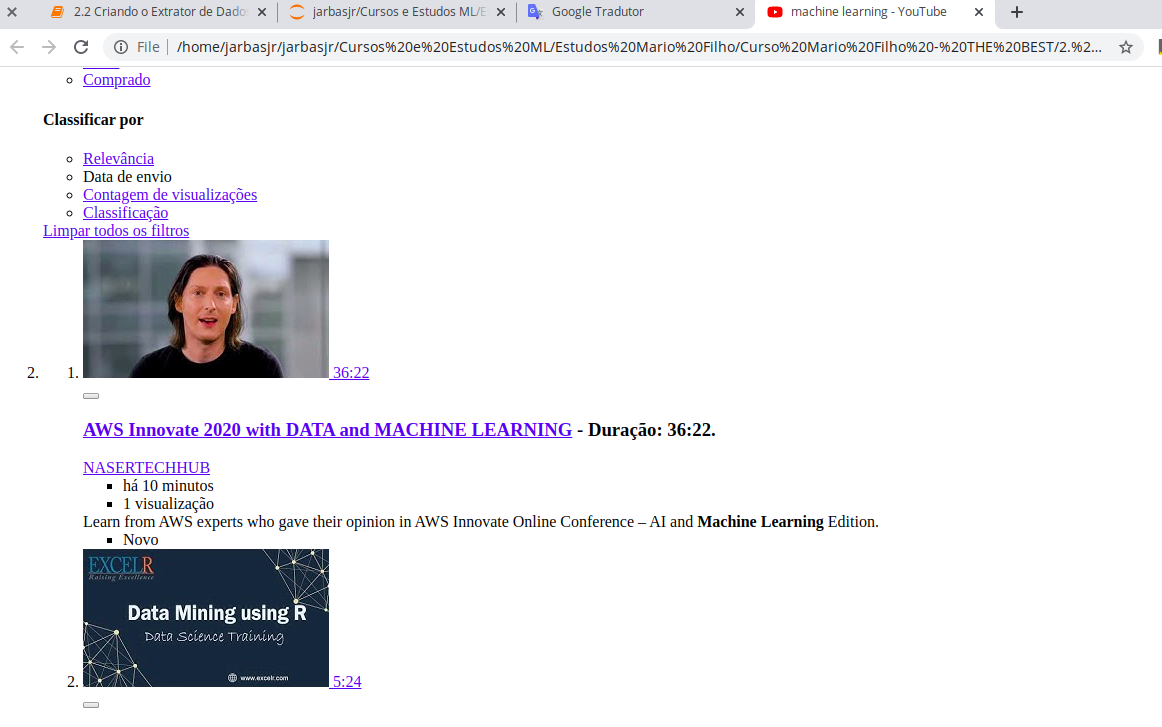

# Processamento dos dados brutos

Essa é a primeira parte da coleta de dados.

Depois que a gente tiver os arquivos salvos na pasta dos dados brutos, vamos criar um loop, que ao invés de buscar com requests as paginas que precisamos, vamos simplesmente abrir os arquivos que salvamos na pasta 'dados_brutos'.

In [6]:
# Novamente vai iterar pelas keywords(queries) e pelas páginas, que salvamos no código anteriormente
# E ele vai abrir cada um desses arquivos e vai ler essa página
# por mais que seja uma pagina html, é uma string, um monte de letra que sao o código daquela pagina
# então lê essa string e armazena na em page_html

for query in queries:
    for page in range(1,2):
        with open("./dados_brutos/{}_{}.html".format(query, page), 'r+') as inp:
            page_html = inp.read()
            
            # Depois usamos beatiful soup para processar essa página.
            # Bib extremamente poderosa que vai basicamente destrinchar toda estrutura da pagina de forma que consigamos acessar tags, fazer busca com expressões regulares
            # entramos na estrutura da pagina e fica mais facil achar as informações que queremos.
            # parsed vira um obejto do beautiful soup
            parsed = bs4.BeautifulSoup(page_html)
            
            # Vou usar a função findAll, ela encontra todas as tags com o nome que passar entre parenteses.
            # no html as tag's link se chamam 'a', nao sei pq se chama 'a'
            # Mas as informações que eu quero dos links ta dentro da tag 'a' e reuna em uma lista para mim, e armazena em tags
            tags = parsed.findAll("a")
            
            # agora iteramos por cada uma das instâncias que ele achou, dessa tag 'a'
            # e procuramos o atributo 'aria-describedby', mas como encontramos esse atributo ?
            # Se olharmos alguma das páginas que foram baixadas, do YT ou outro site, se clicarmos em inspecionar no titulo do video com o link, vemos abrir o código hmtl
            # vamos que a pagina tem muito código, mas quando inspecionamos vamos direto ao código que corresponde ao que clicamos.
            # Depois de explorar, vimos que as tags 'a' tinham a informação que eu queria e ai vi que dentre todos os valores como: class, data section link..
            # vimos que 'aria-describedby' é o mais confiavel para saber que esse link realmente se trata de um vídeos
            # pois tem outros links na pagina que tem essa class, entao quero um elemento que só exista na tag de informação que quero buscar, no caso de videos.
            # isso muda de acordo com pagina e caso que estiver resolvendo. Isso ajuda muito a saber onde a informação que quermos na pagina
            for e in tags:
                # nao to extraindo a informação dessa tag, só estou vendo se "ela tem", então se tem, é o link que eu quero, ou seja, que contem video
                if e.has_attr("aria-describedby"):
                    link = e['href'] # então dessa tag 'a' que tem esse elemento 'aria-describedby', pegamos href que tem o endereço do link
                    title = e['title'] # e tambem o titulo
                    
                    # pra finalizar a visão geral dessa função, tem aqui a segunda fase
                    # depois que extrai as informações da pagina bruta, quero guardar em algum lugar, pra poder buscar pagina de cada
                    # usando 'a+' ele sempre vai add linhas a esse arquivo, ao invés de criar um arquivo do zero toda vez
                    # salvamos como json, e parecido com um dicionario, pela facilidade de salvar sem ter campos muito certinhos, flexibilidade de nao ter que ter exatamente n colunas no csv
                    # vamos salvar qual o video e a query.
                    # e depois o output.write usando função json.dumps que vai pegar esse dicionario e transformar em uma string json.
                    # mario gosta de separar o json com novas linhas "\n", facilita na hora de ler o arquivo.
                    with open("parsed_videos.json", 'a+') as output:
                        data = {"link": link, "title":title, "query": query}
                        output.write("{}\n".format(json.dumps(data)))

## OBS: Testando novamente apenas com a query machine learning e com a pagina 1, para dissecar funcionamento

In [7]:
#html da pagina

parsed

<!DOCTYPE html>
<html data-cast-api-enabled="true" lang="pt-BR"><head><style name="www-roboto">@font-face{font-family:'Roboto';font-style:italic;font-weight:500;src:local('Roboto Medium Italic'),local('Roboto-MediumItalic'),url(//fonts.gstatic.com/s/roboto/v18/KFOjCnqEu92Fr1Mu51S7ACc6CsE.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:italic;font-weight:400;src:local('Roboto Italic'),local('Roboto-Italic'),url(//fonts.gstatic.com/s/roboto/v18/KFOkCnqEu92Fr1Mu51xIIzc.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:400;src:local('Roboto Regular'),local('Roboto-Regular'),url(//fonts.gstatic.com/s/roboto/v18/KFOmCnqEu92Fr1Mu4mxP.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:500;src:local('Roboto Medium'),local('Roboto-Medium'),url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmEU9fBBc9.ttf)format('truetype');}</style><script name="www-roboto">if (document.fonts && document.fonts.load) {docume

In [8]:
# filtra somente uma lista com as tags com links na pagina
parsed.findAll('a')

[<a class="masthead-logo-renderer yt-uix-sessionlink spf-link" data-sessionlink="itct=CAMQsV4iEwjKy_CoxN3nAhUHJZEKHWb2CK8" href="/" id="logo-container" title="Página inicial do YouTube"> <span class="logo masthead-logo-renderer-logo yt-sprite" title="Página inicial do YouTube"></span>
 <span class="content-region">BR</span></a>,
 <a class="yt-uix-button yt-uix-sessionlink yt-uix-button-opacity yt-uix-button-size-default yt-uix-button-has-icon yt-uix-tooltip yt-uix-button-empty" data-sessionlink="ei=7B5NXqvnHITI8wKDvpPoBg&amp;feature=mhsb" href="//www.youtube.com/upload" id="upload-btn" title="Enviar"><span class="yt-uix-button-icon-wrapper"><span class="yt-uix-button-icon yt-uix-button-icon-material-upload yt-sprite"></span></span></a>,
 <a class="guide-item yt-uix-sessionlink yt-valign spf-link" data-external-id="what_to_watch" data-serialized-endpoint="0qDduQEREg9GRXdoYXRfdG9fd2F0Y2g%3D" data-sessionlink="ei=7B5NXqvnHITI8wKDvpPoBg&amp;feature=g-system&amp;ved=CAUQtSwYACITCKuN76jE3ecC

In [9]:
# primeiro link da pagina
tags[0]

<a class="masthead-logo-renderer yt-uix-sessionlink spf-link" data-sessionlink="itct=CAMQsV4iEwjKy_CoxN3nAhUHJZEKHWb2CK8" href="/" id="logo-container" title="Página inicial do YouTube"> <span class="logo masthead-logo-renderer-logo yt-sprite" title="Página inicial do YouTube"></span>
<span class="content-region">BR</span></a>

In [10]:
#tag 0 é a pagina inicial do youtube, ou seja, primeiro link é a pagina inicial do YT
#Logo, acima podemos conferir que ele tem o elemento 'title', confirmando o True
tags[0].has_attr('title')

True

In [11]:
# que nem dicionairo, ele me passa os três elementos que são as classes que foram passadas nessa tag, conforme vemos em tag[0] acima
tags[0]['class']

['masthead-logo-renderer', 'yt-uix-sessionlink', 'spf-link']

In [12]:
# dicionario
data

{'link': '/watch?v=nbcDy1wFWlg',
 'title': 'Essential techniques for tabular competition | Kazuki Onodera | Kaggle Days',
 'query': 'kaggle'}

In [13]:
# ele transforma em uma string, temos as aspas em volta. transforma em uma entidade json
json.dumps(data)

'{"link": "/watch?v=nbcDy1wFWlg", "title": "Essential techniques for tabular competition | Kazuki Onodera | Kaggle Days", "query": "kaggle"}'

In [14]:
df =  pd.read_json("parsed_videos.json", lines=True)
df

,link,title,query
0,/watch?v=w63RO45LpQw,AWS Innovate 2020 with DATA and MACHINE LEARNING,machine+learning
1,/watch?v=j22SOeyETDg,Data Mining Using R: Introduction to Data Mini...,machine+learning
2,/watch?v=q2qay2nfvg4,Using a Machine-Learning Derived Algorithm Ver...,machine+learning
3,/watch?v=p_jUJ0wncxk,Machine Learning Webcam Image classification...,machine+learning
4,/watch?v=8DI_wzTIevE,Cómo Platzi logra responder tus preguntas de C...,machine+learning
...,...,...,...
1999,/watch?v=Ow__XUvn0pA,Imputation Strategy (Japanese Language) | Yuji...,kaggle
2000,/watch?v=C7Tsfrq_g18,Tips N Tricks #3: Creating a clean inference k...,kaggle
2001,/watch?v=FT4LW0kKKos,ML Project in Hindi | Kaggle Competition: Hous...,kaggle
2002,/watch?v=Z0F7e5eidsk,LANL Earthquake Prediction | Hideki Murata (cu...,kaggle
